<a href="https://colab.research.google.com/github/ameyaoka/ml-notebooks/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.6 MB/s eta 0:00:00


In [2]:
  pip install --upgrade huggingface_hubd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement huggingface_hubd (from versions: none)
ERROR: No matching distribution found for huggingface_hubd


In [3]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.9 MB/s eta 0:00:00


In [4]:
import pandas as pd

import torch

In [48]:
from huggingface_hub import notebook_login

notebook_login()

In [6]:

from datasets import load_dataset

# If the dataset is gated/private, make sure you have run huggingface-cli login
dataset = load_dataset("datadrivenscience/movie-genre-prediction")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/54000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/datadrivenscience___parquet/datadrivenscience--movie-genre-prediction-01acd85570f2b187/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
print (dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'movie_name', 'synopsis', 'genre'],
        num_rows: 54000
    })
    test: Dataset({
        features: ['id', 'movie_name', 'synopsis', 'genre'],
        num_rows: 36000
    })
})


In [8]:
train_dataset = dataset['train']

In [9]:
test_dataset = dataset['test']

In [10]:
train_dataset[0]

{'id': 44978,
 'movie_name': 'Super Me',
 'synopsis': 'A young scriptwriter starts bringing valuable objects back from his short nightmares of being chased by a demon. Selling them makes him rich.',
 'genre': 'fantasy'}

In [11]:
print (train_dataset.features)

{'id': Value(dtype='int64', id=None), 'movie_name': Value(dtype='string', id=None), 'synopsis': Value(dtype='string', id=None), 'genre': Value(dtype='string', id=None)}


In [36]:
dataset.set_format("pandas")
train_df = pd.DataFrame(dataset["train"][:])

In [13]:
train_df

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action
...,...,...,...,...
53995,80325,Untitled Monkeyshine/Ugly Brother Project,Two loser pest control buddies find themselves...,scifi
53996,84712,The Great Swindle,A seductive woman gets involved in relationshi...,thriller
53997,69801,When Men Get Pregnant,"Duyen, a wedding dress staff, who decides to c...",romance
53998,7678,Suttu Pidikka Utharavu,The people of a crowded colony in Coimbatore c...,action


In [26]:
train_df["synopsis"]

0        A young scriptwriter starts bringing valuable ...
1        A director and her friends renting a haunted h...
2        This is an educational video for families and ...
3        Scientists working in the Austrian Alps discov...
4        Buy Day - Four Men Widely - Apart in Life - By...
                               ...                        
53995    Two loser pest control buddies find themselves...
53996    A seductive woman gets involved in relationshi...
53997    Duyen, a wedding dress staff, who decides to c...
53998    The people of a crowded colony in Coimbatore c...
53999    Margo is a little mouse that lives quietly in ...
Name: synopsis, Length: 54000, dtype: object

In [14]:
unique_labels =train_df['genre'].unique()

In [15]:
unique_labels

(array(['fantasy', 'horror', 'family', 'scifi', 'action', 'crime',
        'adventure', 'mystery', 'romance', 'thriller'], dtype=object),)

In [16]:
train_df.isnull().sum()

id            0
movie_name    0
synopsis      0
genre         0
dtype: int64

In [17]:
# Let's check the distribution of different labels
import matplotlib.pyplot as plt

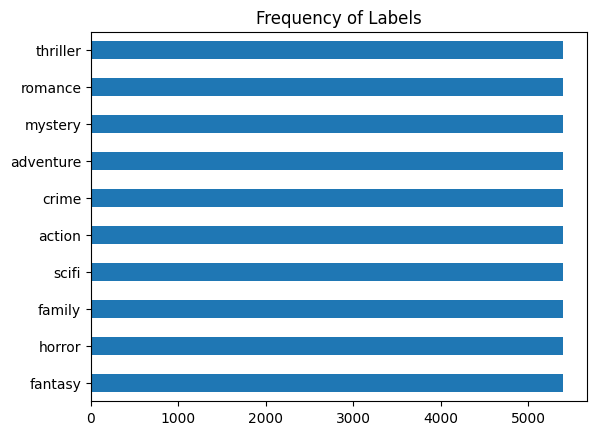

In [18]:
train_df["genre"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Labels")
plt.show()

- The dataset is balanced

## tokenisation


1.     Find a list of all unique words in the dataset.

2.    Associate each word/token with a unique number. This is called vocab.

3.  Encode the dataset using the mapping present in the vocab.


In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [20]:
print (f'vocab size is : {tokenizer.vocab_size}')

vocab size is : 30522


In [21]:
print (f'vocab max length is : {tokenizer.model_max_length}')

print (f'vocab input names is : {tokenizer.model_input_names}')

vocab max length is : 512
vocab input names is : ['input_ids', 'attention_mask']


- Model max length defines the maximum number of tokens that a single data sample can have, i.e. in the above case, our model DistilBert can accept text sequences of up to 512 tokens long.

- Model input names are the fields that the model will take as inputs for training and inference purposes.

In [41]:
      return tokenizer(example["movie_name"].tolist(), example["synopsis"].tolist(), truncation=True)

In [43]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/54000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 54000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 36000
    })
})

In [44]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'movie_name', 'synopsis', 'genre'],
        num_rows: 54000
    })
    test: Dataset({
        features: ['id', 'movie_name', 'synopsis', 'genre'],
        num_rows: 36000
    })
})


In [ ]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)

In [ ]:
tokenized_train[0]

In [ ]:
train_dataset.features

In [ ]:
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
tokenized_dataset = tokenizer(
    train_dataset["movie_name"],
    train_dataset["synopsis"],
    padding=True,
    truncation=True,
)

In [ ]:
tokenized_t_dataset = tokenizer(
    test_dataset["movie_name"],
    test_dataset["synopsis"],
    padding=True,
    truncation=True,
)

In [ ]:
def tokenize_function(example):
    return tokenizer(example["movie_name"], example["synopsis"], truncation=True)

In [ ]:
tokenized_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_datasets

In [ ]:

tokenized_t_datasets = test_dataset.map(tokenize_function, batched=True)
tokenized_t_datasets

In [ ]:
from transformers import  DataCollatorWithPadding

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
!pip install accelerate -U
